In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("weather.csv")
df

,Outlook,Temp,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,0
1,Sunny,Hot,High,Strong,0
2,Overcast,Hot,High,Weak,1
3,Rain,Mild,High,Weak,1
4,Rain,Cool,Normal,Weak,1
5,Rain,Cool,Normal,Strong,0
6,Overcast,Cool,Normal,Strong,1
7,Sunny,Mild,High,Weak,0
8,Sunny,Cool,Normal,Weak,1
9,Rain,Mild,Normal,Weak,1


In [3]:
input_table =df.drop('Play',axis=1)

In [4]:
input_table

,Outlook,Temp,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [5]:
target= df['Play']

In [6]:
target

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
Name: Play, dtype: int64

In [7]:
from sklearn.preprocessing  import LabelEncoder
out_n=LabelEncoder()
temp_n=LabelEncoder()
Humi_n=LabelEncoder()
wind_n=LabelEncoder()


In [8]:
input_table["Outlook_n"]=out_n.fit_transform(input_table["Outlook"])
input_table["Temp_n"]=temp_n.fit_transform(input_table["Temp"])
input_table["Humidity_n"]=Humi_n.fit_transform(input_table["Humidity"])
input_table["Wind_n"]=wind_n.fit_transform(input_table["Wind"])
input_table

,Outlook,Temp,Humidity,Wind,Outlook_n,Temp_n,Humidity_n,Wind_n
0,Sunny,Hot,High,Weak,2,1,0,1
1,Sunny,Hot,High,Strong,2,1,0,0
2,Overcast,Hot,High,Weak,0,1,0,1
3,Rain,Mild,High,Weak,1,2,0,1
4,Rain,Cool,Normal,Weak,1,0,1,1
5,Rain,Cool,Normal,Strong,1,0,1,0
6,Overcast,Cool,Normal,Strong,0,0,1,0
7,Sunny,Mild,High,Weak,2,2,0,1
8,Sunny,Cool,Normal,Weak,2,0,1,1
9,Rain,Mild,Normal,Weak,1,2,1,1


In [9]:
input_table=input_table.drop(labels=['Outlook',"Temp","Humidity","Wind"], axis=1)
input_table

,Outlook_n,Temp_n,Humidity_n,Wind_n
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [10]:
from sklearn import tree

model=tree.DecisionTreeClassifier()
model.fit(input_table,target)
model

DecisionTreeClassifier()

In [11]:
model.predict([[2,1,1,0]])

C:\Users\satya\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

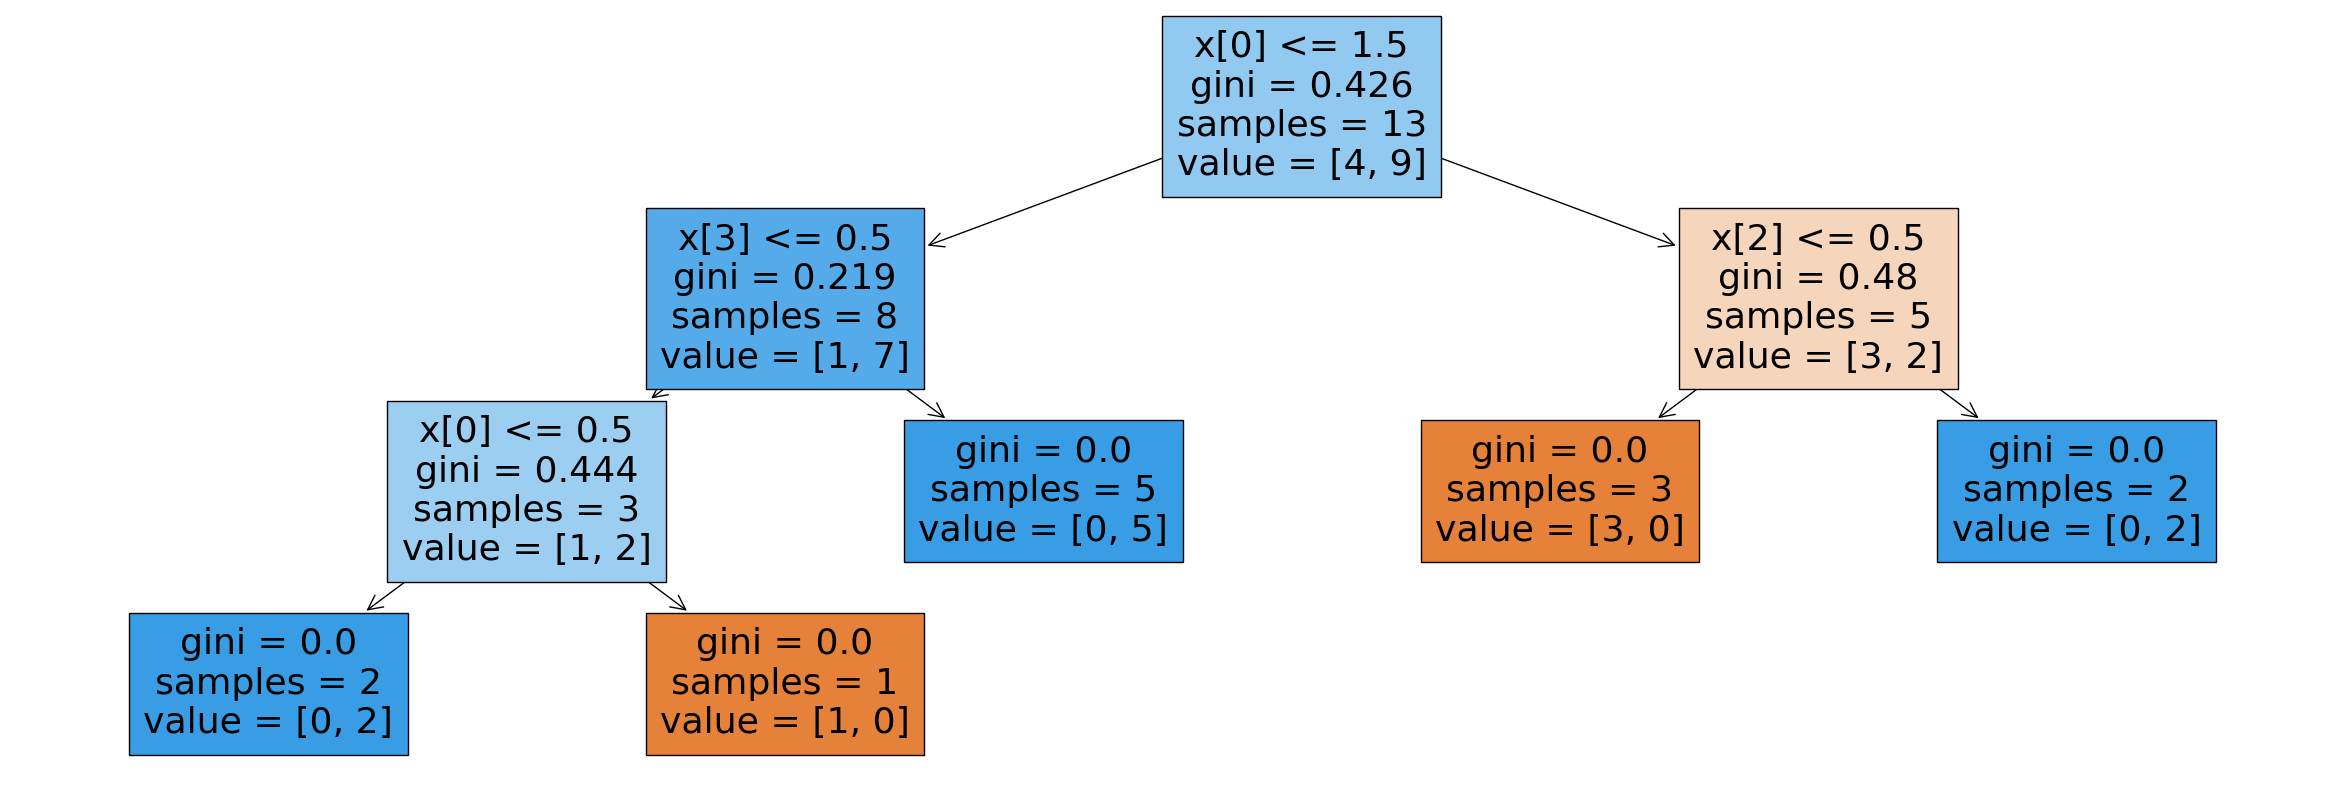

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
tree.plot_tree(model,filled=True)
plt.show()

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("weather.csv")

df = pd.get_dummies(df, columns=["Outlook", "Temp", "Humidity", "Wind"], drop_first=True)

X = df.drop(columns=["Play"])
y = df["Play"]

clf = DecisionTreeClassifier()
clf.fit(X, y)

from sklearn.tree import export_text
print(export_text(clf, feature_names=X.columns.tolist()))


|--- Outlook_Sunny <= 0.50
|   |--- Wind_Weak <= 0.50
|   |   |--- Outlook_Rain <= 0.50
|   |   |   |--- class: 1
|   |   |--- Outlook_Rain >  0.50
|   |   |   |--- class: 0
|   |--- Wind_Weak >  0.50
|   |   |--- class: 1
|--- Outlook_Sunny >  0.50
|   |--- Humidity_Normal <= 0.50
|   |   |--- class: 0
|   |--- Humidity_Normal >  0.50
|   |   |--- class: 1



Model Accuracy: 1.00
Confusion Matrix:
 [[11  0]
 [ 0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



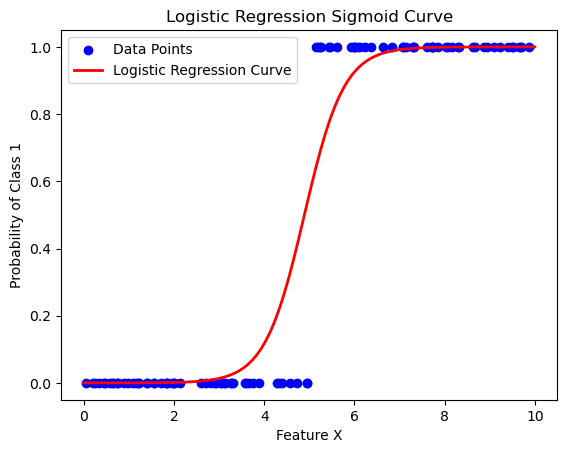